## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [4]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import numpy as np

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import tensorflow as tf
#from tensorflow.keras.callbacks import EarlyStopping
tf.reset_default_graph()
tf.set_random_seed(42)

In [0]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train, x_test = x_train/255, x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

### Import the necessary layers from keras to build the model

In [0]:
model = tf.keras.models.Sequential()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', input_shape=(28,28,1)))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.Flatten())

#Dense layer 1
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Dense layer 2
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode= 'max',patience=5)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train,Y_train, epochs=10,callbacks=[cb])

Epoch 1/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.6789 - acc: 0.7491

W0818 09:41:25.914773 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 127us/sample - loss: 0.6780 - acc: 0.7495
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.4817 - acc: 0.8245

W0818 09:41:33.330371 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 124us/sample - loss: 0.4819 - acc: 0.8245
Epoch 3/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.4255 - acc: 0.8445

W0818 09:41:40.772999 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 124us/sample - loss: 0.4253 - acc: 0.8446
Epoch 4/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.3877 - acc: 0.8596

W0818 09:41:48.381272 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 127us/sample - loss: 0.3876 - acc: 0.8596
Epoch 5/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.3612 - acc: 0.8685

W0818 09:41:55.790668 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 123us/sample - loss: 0.3610 - acc: 0.8686
Epoch 6/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.3395 - acc: 0.8759

W0818 09:42:03.159749 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 123us/sample - loss: 0.3392 - acc: 0.8759
Epoch 7/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.3224 - acc: 0.8817

W0818 09:42:10.468380 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 122us/sample - loss: 0.3223 - acc: 0.8817
Epoch 8/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.3060 - acc: 0.8860

W0818 09:42:17.799672 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 122us/sample - loss: 0.3060 - acc: 0.8860
Epoch 9/10
59552/60000 [============================>.] - ETA: 0s - loss: 0.2877 - acc: 0.8938

W0818 09:42:25.218727 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 124us/sample - loss: 0.2879 - acc: 0.8938
Epoch 10/10
59712/60000 [============================>.] - ETA: 0s - loss: 0.2704 - acc: 0.9004

W0818 09:42:32.676717 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 124us/sample - loss: 0.2707 - acc: 0.9002


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model2 = tf.keras.models.Sequential()
#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu', input_shape=(28,28,1)))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add Maxpool Layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dropout Layer
model2.add(tf.keras.layers.Dropout(0.25))

#Add Flatten Layer

model2.add(tf.keras.layers.Flatten())

#Dense layer 1
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Dense layer 2
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model2.fit(x_train,Y_train, epochs=10,callbacks=[cb])

Epoch 1/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.7383 - acc: 0.7268

W0818 09:47:48.368044 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 119us/sample - loss: 0.7375 - acc: 0.7271
Epoch 2/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.5289 - acc: 0.8030

W0818 09:47:55.224497 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 114us/sample - loss: 0.5287 - acc: 0.8031
Epoch 3/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.4815 - acc: 0.8219

W0818 09:48:02.197886 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 116us/sample - loss: 0.4810 - acc: 0.8222
Epoch 4/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.4431 - acc: 0.8359

W0818 09:48:09.148632 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 116us/sample - loss: 0.4430 - acc: 0.8359
Epoch 5/10
59552/60000 [============================>.] - ETA: 0s - loss: 0.4075 - acc: 0.8519

W0818 09:48:16.193468 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 117us/sample - loss: 0.4071 - acc: 0.8521
Epoch 6/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.3752 - acc: 0.8625

W0818 09:48:23.438140 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 121us/sample - loss: 0.3754 - acc: 0.8625
Epoch 7/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.3487 - acc: 0.8718

W0818 09:48:30.606048 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 119us/sample - loss: 0.3488 - acc: 0.8716
Epoch 8/10
59520/60000 [============================>.] - ETA: 0s - loss: 0.3295 - acc: 0.8788

W0818 09:48:37.462365 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 114us/sample - loss: 0.3293 - acc: 0.8788
Epoch 9/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.3082 - acc: 0.8845

W0818 09:48:44.427536 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 116us/sample - loss: 0.3083 - acc: 0.8844
Epoch 10/10
59712/60000 [============================>.] - ETA: 0s - loss: 0.2938 - acc: 0.8913

W0818 09:48:51.308298 140605334267776 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 115us/sample - loss: 0.2936 - acc: 0.8914


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

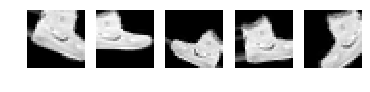

In [43]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [45]:
model2.fit_generator(datagen.flow(x_train, Y_train, batch_size = 32),
 validation_data = (x_test, Y_test), steps_per_epoch = len(x_train) // 32,
 epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.2449 - acc: 0.5455 - val_loss: 0.6742 - val_acc: 0.7538
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.0115 - acc: 0.6301 - val_loss: 0.6376 - val_acc: 0.7570
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9322 - acc: 0.6568 - val_loss: 0.6380 - val_acc: 0.7679
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8834 - acc: 0.6736 - val_loss: 0.5842 - val_acc: 0.7777
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8457 - acc: 0.6842 - val_loss: 0.5911 - val_acc: 0.7822
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8081 - acc: 0.6974 - val_loss: 0.5634 - val_acc: 0.7836
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7900 - acc: 0.7056 - val_loss: 0.5396 - val_acc: 0.7985
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [48]:
model2.evaluate(x_train,Y_train)

60000/60000 [==============================] - 4s 75us/sample - loss: 0.5241 - acc: 0.7972


[0.5240583042462666, 0.79718333]

In [49]:
model2.evaluate(x_test,Y_test)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.5431 - acc: 0.7912


[0.543058793926239, 0.7912]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [120]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

### **Prepare/fit the generator.**

In [0]:
x_train = x_train.reshape((50000,32,32,3))
x_test = x_test.reshape((10000,32,32,3))

In [0]:
x_train, x_test = x_train/255, x_test/255

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [0]:
data_gen.fit(x_train)

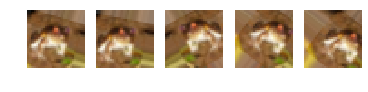

In [125]:
from matplotlib import pyplot as plt
gen2 = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen2.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()